Text(0.5, 1.0, 'Centroids')

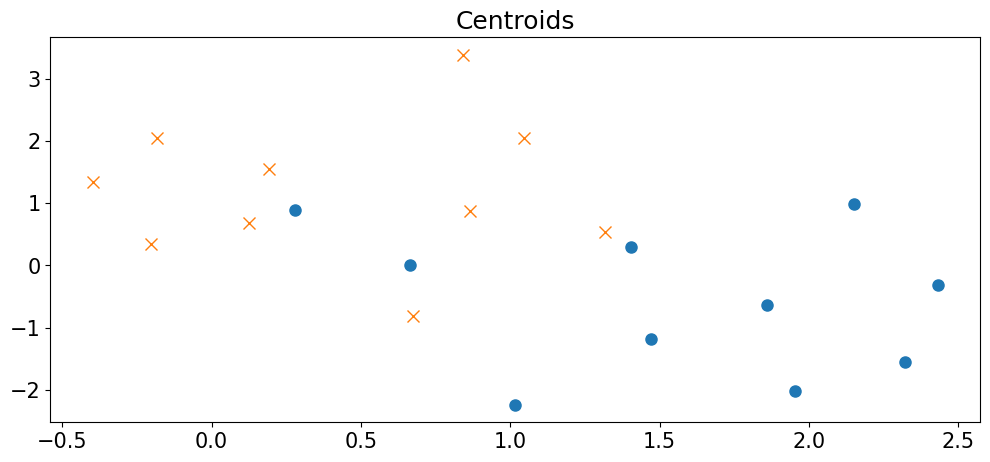

In [2]:
# k-NN algorithm by hand and evalutation of "train" and "test" error in function of "k"

%matplotlib inline
import numpy as np
np.random.seed(1234)
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 9)
plt.rcParams['font.size'] = 15

# We need to generate synthetic data (this means we will know the probability distribution of the datapoint which is uncommon in real life situation).
# We use the Gaussian Mixture Model (GMM) to generate the points. A GMM assumes that the data points are generated from a mixture of several Gaussian distributions. Each Gaussian represents a cluster in the data.
# Also a gaussian distribution is characterized by two parameters: the mean and the covariance for the shape and spread of the distribution (1D: sigma squared (variance), 2D the covariance matrix).

centroids_per_class = 10

class0_centroids = [1,0] + np.random.randn(centroids_per_class, 2) #We generate a 10-row-2-colum array of randomly sampled pints of a gaussian distribution with mean 0 and var 1 and shift the whole think over with the [1,0] element so they are centered around that point.
class1_centroids = [0,1] + np.random.randn(centroids_per_class, 2)

#  We plot the centroids
plt.figure(figsize=((12,5)))
plt.plot(class0_centroids[:, 0], class0_centroids[:, 1], "o", markersize=8)
plt.plot(class1_centroids[:, 0], class1_centroids[:, 1], "x", markersize=8)
plt.title("Centroids")


Object `does` not found.


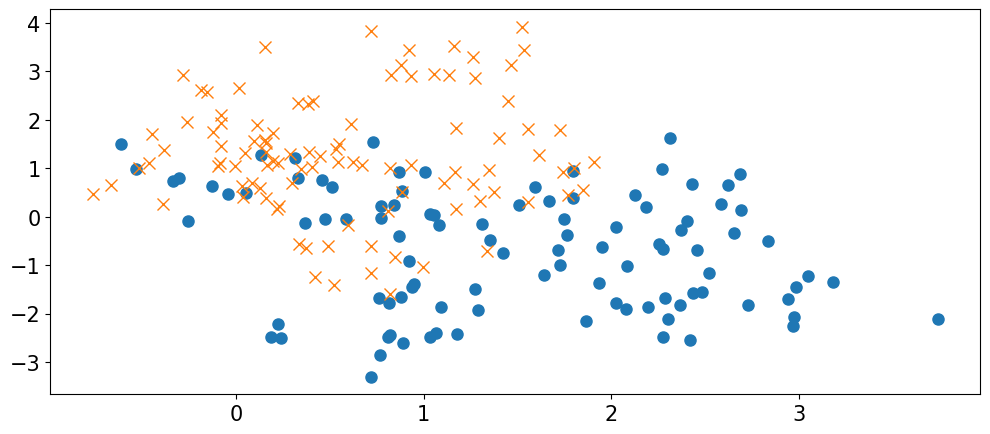

In [3]:
samples_per_class = 100

# We generate an vector of random integers between 0 and 9 to randomly select on of the 10 centroids previously generated
class0_labels = np.random.randint(10, size = samples_per_class)
class1_labels = np.random.randint(10, size = samples_per_class)

# Now we generate the actual samples
class0_samples = class0_centroids[class0_labels, :] + np.sqrt(1. / 5) * np.random.randn(samples_per_class, 2) #For each sample in class 0 it adds noise, creating natural variation around the centroids
class1_samples = class1_centroids[class1_labels, :] + np.sqrt(1. / 5) * np.random.randn(samples_per_class, 2)

# Plot data
plt.figure(figsize=((12,5)))
plt.plot(class0_samples[:, 0], class0_samples[:, 1], "o", markersize=8)
plt.plot(class1_samples[:, 0], class1_samples[:, 1], "x", markersize=8)
plt.title("Samples") can you explainto me what this code does?

#print (class0_labels)
#print (class1_labels)
#print (class0_samples)
#print (class1_samples)

In [4]:
#A good way to structure a classification problem is to start with a matrix "X" of size N (number of sample) by P (number of features) and a label vector "Y" saying to which class each sample belongs to

X = np.vstack((class0_samples, class1_samples))
y = np.hstack((np.zeros(samples_per_class), np.ones(samples_per_class)))

#print (X)
#print (Y)

n_samples, n_features = np.shape(X)   #This assigns the number of rows to "n_samples" and the number of columns to "features"

#Now we want to compute the distances of every point from another, we have two ways:

#------NOT EFFICIENT-------- (we have a for loop)

#def compute_distances(X):
#    n_samples = len(X)
#    distances = np.zeros((n_samples, n_samples))
#
#    for i in range(n_samples):
#        for j in range(n_samples):
#            distances[i, j] = np.sqrt((X[i, 0] - X[j, 0]) ** 2 + (X[i, 1] - X[j, 1]) ** 2)
#
#    return distances

#------EFFICIENT-----------

from scipy.spatial.distance import cdist
distances = cdist(X, X)

In [5]:
# Define the function to compute the nearest k-neighbour for each datapoint

def knn(X, y, k):             #X and y we defined above, k is going to be the number of nearest neighbours to consider
    n_samples = len(y)
    distances = cdist(X, X)
    estimate = np.zeros(n_samples)

    for i in range(n_samples):
        nns = np.argpartition(distances[:, i], k)[:k]   #This takes the column i of the distances matrix (distances of all points to point i) and selects ONLY the k the closest. nns now contains the indices of the k-nearest neighbors for sample i.

        estimate[i] = int(sum(y[nns] == 1) > sum(y[nns] == 0))  #y[nns] extracts the labels of the nearest points to sample i, sum () counts the values that are 1 and 0, finally we investigate which one turns up more frequently: if the disequation is verified the line prints a 1 (True), otherwise a 0 (False)
    return estimate

est_labels = knn(X, y, 10)
#print (est_labels)

# Let us compute the training error
train_error = np.mean(y != est_labels)  # "y != est_labels" returns an bolean array comparing the values "est_labels" with the true values "y", after that "np.mean" takes the mean of the array, the closer to 0 the better!
print(f"The train error is {train_error}")


The train error is 0.17


In [6]:
#------------------EVALUATED------------------Now we need to test our model with test data


testsamples_per_class = 10000

class0_testlabels = np.random.randint(10, size = testsamples_per_class)
class1_testlabels = np.random.randint(10, size = testsamples_per_class)
class0_testsamples = class0_centroids[class0_testlabels, :] + np.sqrt(1. / 5) * np.random.randn(testsamples_per_class, 2)
class1_testsamples = class1_centroids[class1_testlabels, :] + np.sqrt(1. / 5) * np.random.randn(testsamples_per_class, 2)

X_test = np.vstack((class0_testsamples, class1_testsamples))
y_test = np.hstack((np.zeros(testsamples_per_class), np.ones(testsamples_per_class)))

# Plot test data
#plt.figure(figsize=((12,5)))
#plt.plot(X_test[y_test == 0, 0], X_test[y_test == 0, 1], "o", ms=8)
#plt.plot(X_test[y_test == 1, 0], X_test[y_test == 1, 1], "x", ms=8)

def knn_test(X_train, y_train, X_test, y_test, k):
    n_test_samples = len(X_test)
    estimate = np.zeros(n_test_samples)

    distances = cdist(X_test, X_train)    # Compute distances between test samples and training samples, this is crucial not to mix up!!!!!

    for i in range(n_test_samples):

        nns = np.argpartition(distances[i], k)[:k]
        estimate[i] = int(sum(y_train[nns] == 1) > sum(y_train[nns] == 0))

    return estimate

est_labels_test = knn_test(X, y, X_test, y_test, 10) #!

test_error = np.mean(y_test != est_labels_test)
print(f"The test error is {test_error}")

The test error is 0.20225


k = 1; train error = 0, test error = 0.23825
k = 2; train error = 0.12, test error = 0.26285
k = 3; train error = 0.1, test error = 0.2057
k = 4; train error = 0.115, test error = 0.21575
k = 5; train error = 0.125, test error = 0.2016
k = 6; train error = 0.14, test error = 0.2155
k = 7; train error = 0.135, test error = 0.19815
k = 8; train error = 0.165, test error = 0.2087
k = 9; train error = 0.165, test error = 0.1979
k = 10; train error = 0.17, test error = 0.20225
k = 11; train error = 0.15, test error = 0.1878
k = 12; train error = 0.17, test error = 0.1925
k = 13; train error = 0.16, test error = 0.1838
k = 14; train error = 0.165, test error = 0.18565
k = 15; train error = 0.16, test error = 0.178
k = 16; train error = 0.16, test error = 0.17905
k = 17; train error = 0.145, test error = 0.17795
k = 18; train error = 0.175, test error = 0.1811
k = 19; train error = 0.175, test error = 0.18125
k = 20; train error = 0.185, test error = 0.1801
k = 21; train error = 0.165, test e

Text(0, 0.5, 'misclassification error')

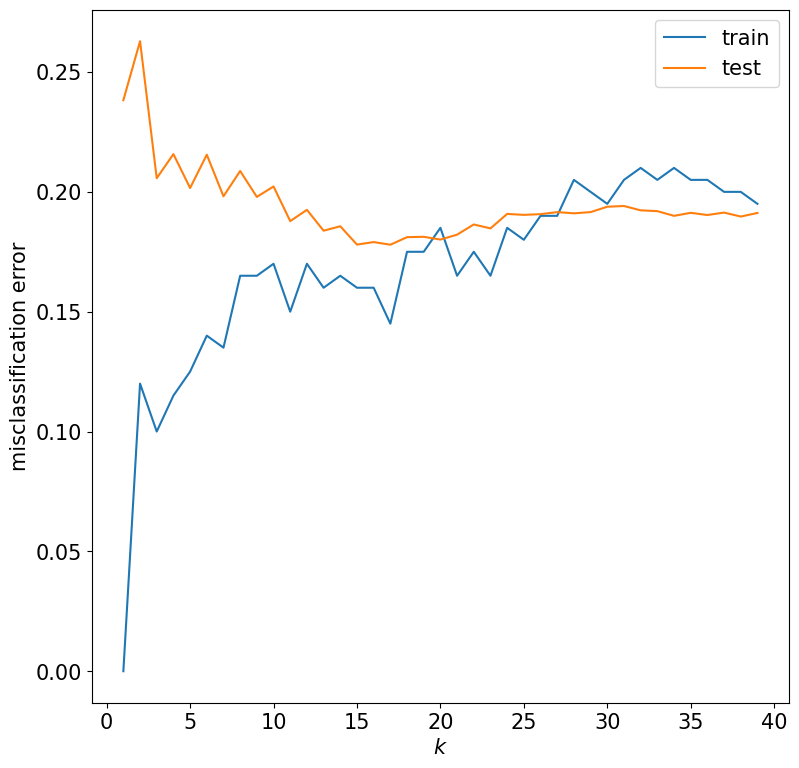

In [7]:
#As pointed out now we really want to investigate HOW we choose the right k, we start out by defining the two functions that can esly calculate the train and test errors

def compute_train_error(X, y, k=1):
    y_hat = knn(X, y, k)
    return np.mean(y != y_hat)

def compute_test_error(X_train, y_train, X_test, y_test, k=1):
    y_hat = knn_test(X_train, y_train, X_test, y_test, k)
    return np.mean(y_test != y_hat)

# Run functions for k belonging to a range of values, as seen in class, the train error with k=1 is zero as we are comparing a point to itself!
ks = np.arange(1, 40)
train_error = []
test_error = []
for (i,k) in enumerate(ks):         #The function enumerate makes it possible to loop over the values in ks while keeping track of both the value k and index i, i is simply the index of the loop so when i=0, k=1 and so on
    train_error.append(compute_train_error(X, y, k))
    test_error.append(compute_test_error(X, y, X_test, y_test, k))
    print("k = %d; train error = %g, test error = %g" % (k, train_error[-1], test_error[-1]))    #The [-1] is used to access the last element of a list in Python. In this case, it refers to the most recent values added to the train_error and test_error lists.

# Plot results
plt.plot(ks, train_error, label = "train")
plt.plot(ks, test_error, label = "test")
plt.legend()
plt.xlabel(r"$k$")
plt.ylabel("misclassification error")


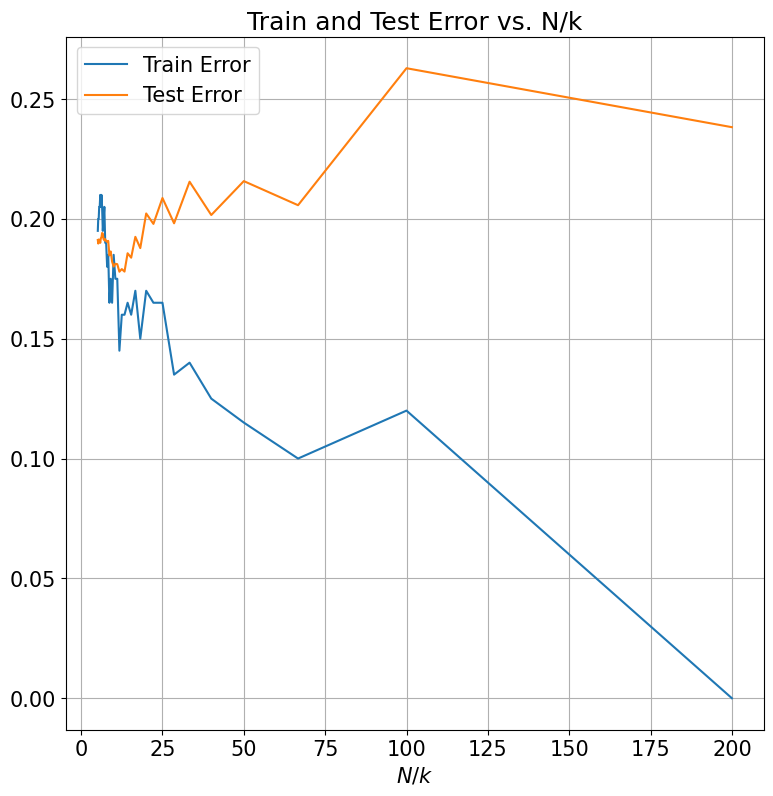

In [9]:
#Now lets plot N/k, where N is the number of training samples used and k is the number of nearest neighbours.

#In the extreme case k=N (N\k=1) we might experience severe overfitting where all the points might be assigned to the same label

N = len(X)
Nk = N / ks

plt.plot(Nk, train_error, label="Train Error")
plt.plot(Nk, test_error, label="Test Error")
plt.legend()
plt.xlabel(r"$N/k$")
plt.title("Train and Test Error vs. N/k")
plt.grid(True)
plt.show()



Bayes train error = 0.16, Bayes test error = 0.1615


Text(0, 0.5, 'misclassification error')

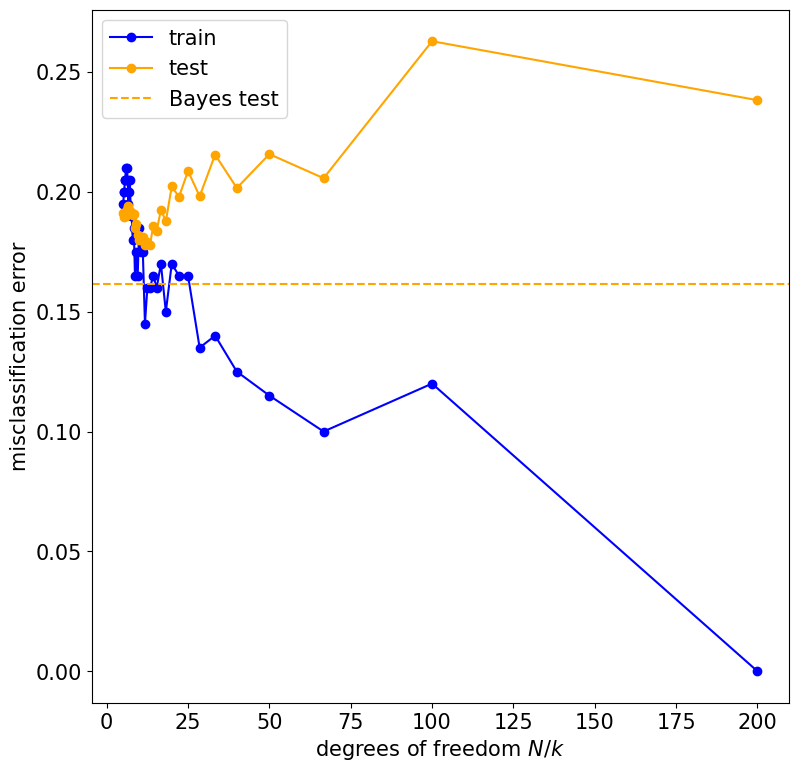

In [13]:
#--------------------BONUS----------------------



def BayesFunction(class0_centroids,class1_centroids,position):             #The BayesFunction takes in two arrays of centroids (one for class 0 and one for class 1) and a single position to classify
 diff0 = class0_centroids - position ; diff1 = class1_centroids - position
 exponents0 = np.sum(diff0**2,axis=1) ; exponents1 = np.sum(diff1**2,axis=1)
 p0=sum(np.exp(-2.5*exponents0))
 p1=sum(np.exp(-2.5*exponents1))
 if p0>p1:
  return 0
 else:
  return 1

def ComputeBayesError(class0_centroids,class1_centroids,label,pos):        #for label we intend the true labels for the test data.
 frac=0
 for i in range(max(pos.shape)):
  pred = BayesFunction(class0_centroids,class1_centroids,pos[i])
  if pred != label[i]:               #we check if the prediction matches the label
     frac=frac+1                     #frac was initialized at zero and will literally count the number of incorrect predicitons
 return frac/max(pos.shape)

train_error_bayes = ComputeBayesError(class0_centroids, class1_centroids, y, X)
test_error_bayes = ComputeBayesError(class0_centroids, class1_centroids, y_test, X_test)
print("Bayes train error = %g, Bayes test error = %g" % (train_error_bayes, test_error_bayes))

plt.plot(len(y) / np.array(ks), train_error, "-o", label = "train",c='blue')
plt.plot(len(y) / np.array(ks), test_error, "-o", label = "test", c='orange')
plt.axhline(test_error_bayes,linestyle='dashed', label='Bayes test',c='orange')
plt.legend()
plt.xlabel(r"degrees of freedom $N / k$")
plt.ylabel("misclassification error")
#plt.ylim((0.025, 0.15))